# Project overview

The goal of this project is to predict the `selling price` of a house based on it's housing details like `area`, `bedrooms`, `bathrooms`, `stories`, `mainroad`, `guestroom` etc. The resources and other extra datasets are also provided in my github repository. (https://github.com/RishatTalukder/learning_machine_learning/tree/main/Neural_Nets_%26_Deep_Learning)

You can have a look at my article on `Neural Networks & Deep Learning` in linkedin(https://www.linkedin.com/feed/update/urn:li:activity:7182710281008037888/) to understand this project in a better way.

I'll try to make a `Neural Network` model to predict the selling price of the house.

> I'll suggest you go through the whole article with me to understand the whole process of the project.

First step of any `machine learning/deep learning` project is to import the necessary libraries and the dataset. 

## Importing the Libraries and Dataset



In [1]:
import numpy as np
import pandas as pd # data
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
#warning
import warnings

warnings.filterwarnings('ignore')

Time to get the `dataset`.

In [3]:
df = pd.read_csv("./TensorFlow_FILES/DATA/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


We, we have successfully imported the necessary `libraries` and the `dataset`. Now, let's move forward to understand the dataset.

> You can download the dataset from my github repository or from `kaggle`.(https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)


## Exploratory Data Analysis (EDA)

`EDA` is a very important step in the process of building a machine learning model and understanding the dataset. The main goals of `EDA` are:

- `Sourcing the data` (which we have already done)
- `Exploring the data`
- `Cleaning the data` 
- `Verifying the data`
- `Building intuition from the data`
- `Identifying patterns in the data`

I'll try to explain all this steps in the process as I go through the project.

Let's start with the first step of `EDA` which is `sourcing the data`.

### Explore the dataset

First thing of exoloring the dataset is to check the first few rows of the dataset. It will give us an idea about the columns and the data in the columns.



In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Next is to check the `rows` and `columns` of the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Looks like We have `20 columns` and `21597 rows` in the dataset. Which is great.

> The bigger the dataset, the better the model.

In the Information section, I can see that there are no `null/missing` values in the dataset. But to be sure there is a technique I like to see the `null` values in the dataset.

In [6]:
df.isnull().sum() # this returns the summ of all the null values in the dataset

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

AAANDDD, We can say for sure that there are no `null` values in the dataset. 

Now what we can do is to check the `statistics` of the dataset. It will give us an idea about the `mean`, `median`, `standard deviation`, `min`, `max` etc of the dataset.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


Well. this was disappointing. The `statistics` of the dataset is not readable. So, I'll do some `visualization` to understand the dataset better.

#### Data Visualization

One of the things that I like to do for `these kind of dataset` especially for `regression` problem is to check the `distribution` of the `target variable`. It will give us an idea about the `distribution` of the `target variable` and the `outliers` in the dataset.

<Axes: xlabel='price', ylabel='Count'>

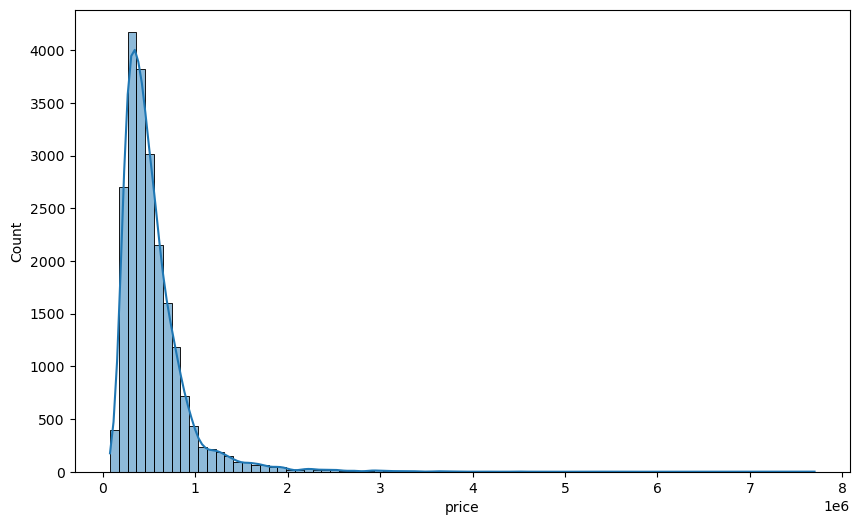

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['price'],bins=80,kde=True)

Well we can see that most of the `houses` are in the `range` of `0 to 1.5` million. But there are some `houses` which are in the `range` of `2.5 to 7` million But not many houses are in the range greater than `3 million`.

We can make a `neural network` model to predict the `selling price` really well in the `range` of `0 to 1.5` million. But for the `houses` which are in the `range` of `2.5 to 7` million, the model will not be able to predict the `selling price` that well but if we `train` the model with more `data` in that `range`, the model will be able to predict the `selling price` of the `houses` in that `range` as well.

Next I'll visualize the `bedrooms` count in the dataset.

<Axes: xlabel='bedrooms', ylabel='count'>

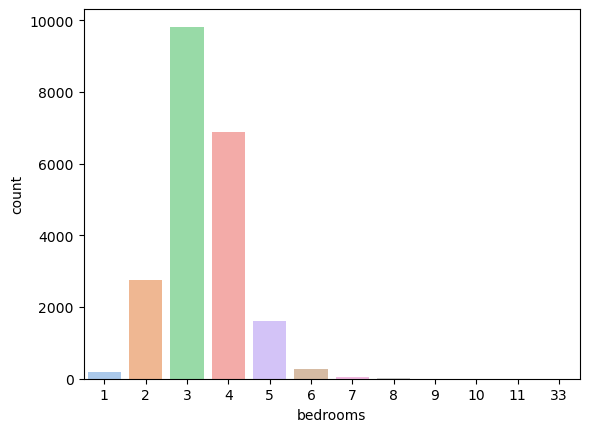

In [9]:
sns.countplot(data=df,x='bedrooms', palette="pastel")

Well we can see that most of the `houses` have `3 bedrooms` in the dataset. But there are also `houses` with `4`, `2`, `5`, `6`, `7` and `8` `bedrooms` in the dataset. But someone has a `33 bedrooms` mansion in the dataset too.

Other ways to get a good understanding of the dataset is to check the `correlation` of the dataset.

In [10]:
df.corr()

ValueError: could not convert string to float: '10/13/2014'

We cannot find the `correration` because there is a single column which is `object` type which is `date` column. So, I'll drop the `date` column and then I'll check the `correlation` of the dataset.

In [11]:
df.drop('date',axis=1).corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


This is the `correlation` of every column with every other column in the dataset. We don't need this we only need the `correlation` of the `target variable` with the other columns. So, I'll check the `correlation` of the `price` column with the other columns.

In [12]:
df.drop('date',axis=1).corr()['price'].sort_values() # we dropped the date column and then we got the correlation of data, then took the price column and sorted it in ascending order

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

You can see the correlation of the `price` column with the other columns starting from the most `-0.05` to the most `0.7`. Price is most correlated with price itself which is `1` so we cannot consider that. The most correlated column with the `price` column is `sqft_living` which is `0.7`.


To visualize the `correlation` of the `price` column with it's most `correlated` column which is `sqft_living`, I like make a `scatter plot` of the `price` column with the `sqft_living` column.

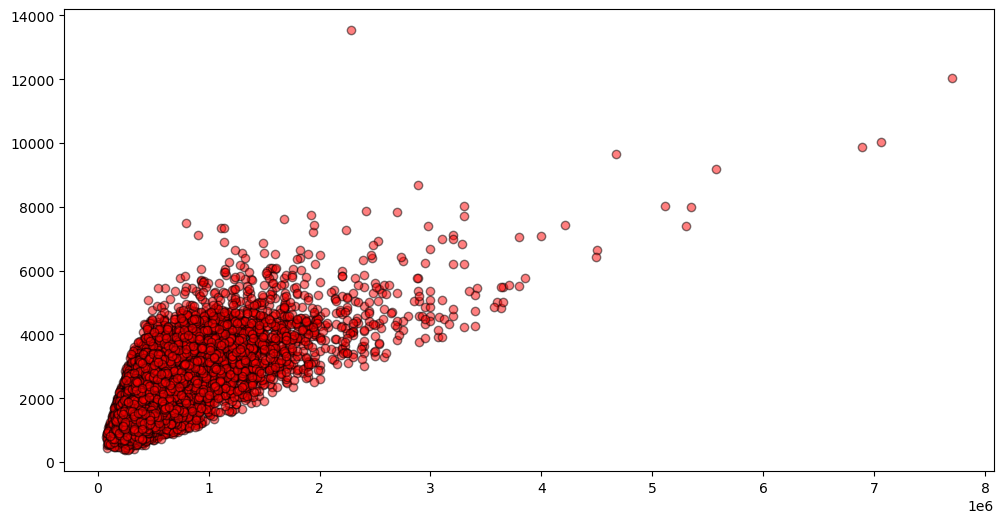

In [13]:
plt.figure(figsize=(12,6))
plt.scatter(df['price'],df['sqft_living'],edgecolors='black',alpha=0.5, c='r')

We can see a good `positive correlation` and if you know about `linear regression`, you can see that a `line` can be drawn to predict the `price` of the `house` based on the `sqft_living` column.

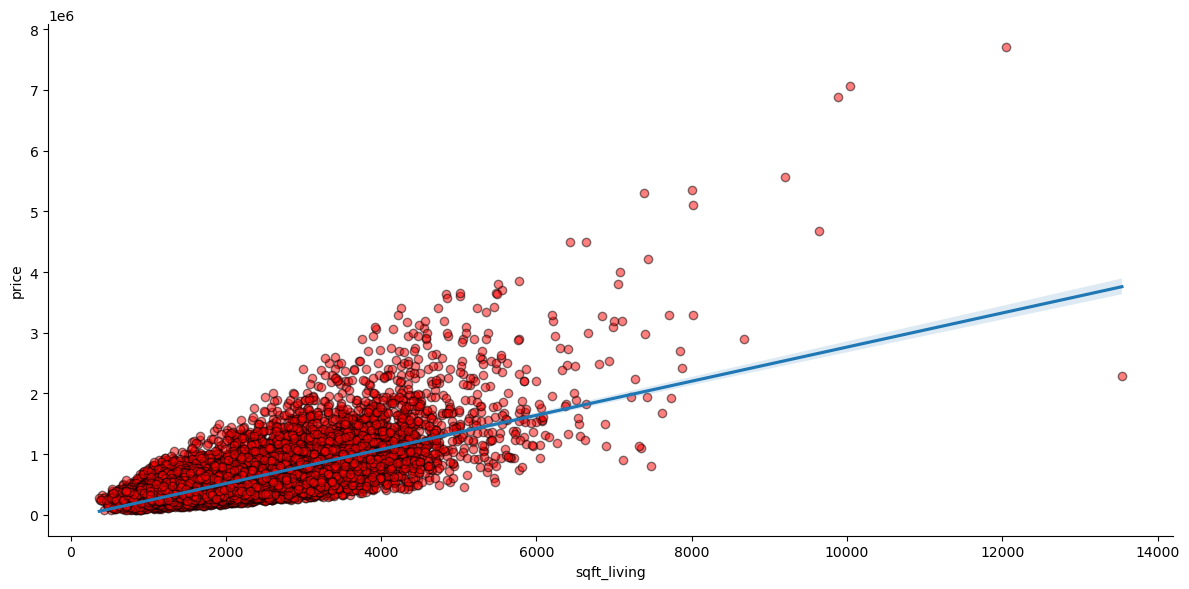

In [14]:
sns.lmplot(x='sqft_living',y='price',data=df,aspect=2, height=6, scatter_kws={'alpha':0.5, 'edgecolor':'black', 'color':'r'})

There, a `regression line` is drawn to predict the `price` of the `house` based on the `sqft_living` column. But we are not doing `linear regression` here we are doing `neural network`.

We can also visualize the `price` column with the `bedrooms` column.

<Axes: xlabel='bedrooms', ylabel='price'>

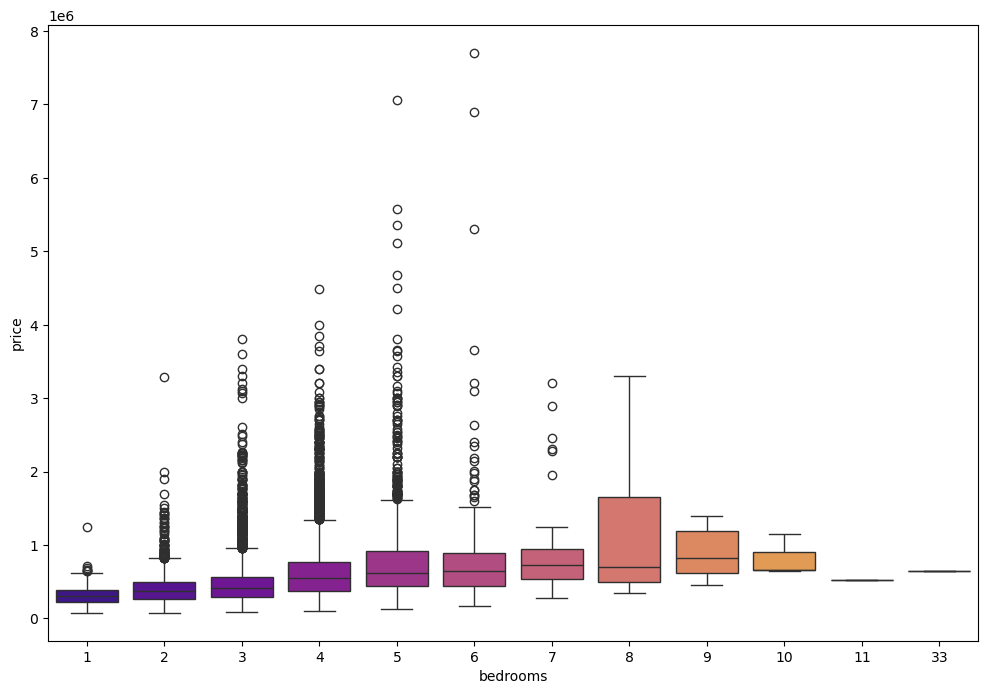

In [15]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df, palette='plasma') 

Well we can see from this `boxplot` that the `price` of the `house` increases with the increase in the number of `bedrooms` in the `house` but we can also see that 5 `bedrooms` and 6 `bedrooms` `houses` have the same `price` range. So, we can say that the `price` of the `house` does not increase with the increase in the number of `bedrooms` after `5 bedrooms`.

Now, a recap of what we did up until now:

- We sourced the data
- We explored the price column with it's correlation with other columns and visualized it

But if we look at the columns.

In [16]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

There are two columns `long` and `lat` is kind of confusion if you don't know what they are. I'll suggest you to check the `data description` of the dataset in the link I provided above from `kaggle`.

`lat` is the `latitude` of the `house` and `long` is the `longitude` of the `house`. Meaning where the `house` is located in `king county`.

This is the ultimate test of the `dataset` and for us a information `treasure`. We can see the `latitude` and `longitude` of the `houses` in the `king county`. We can use this information to visualize the `houses` in the `king county` on a `map`.

Here's a king county map.

<img src="https://pbs.twimg.com/media/FHPivxHUYAQLDVf?format=jpg&name=4096x4096" alt="king county map" width="500" height="500">

Now we can plot the `latitude` and `longitude` of the `houses` in the `king county` on the `map`.

<Axes: xlabel='long', ylabel='lat'>

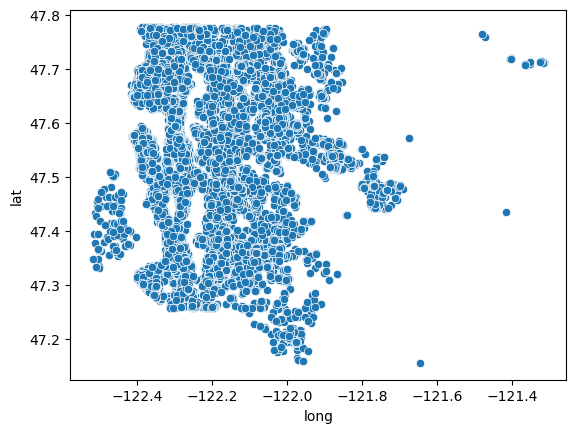

In [17]:
sns.scatterplot(x='long',y='lat',data=df)

Perfect. It looks almost exactly like the `king county` map. Now we can see the `houses` in the `king county`..

If we are little cleaver we can visulize where in the map the `houses` are more expensive and where the `houses` are less expensive.

<Axes: xlabel='long', ylabel='lat'>

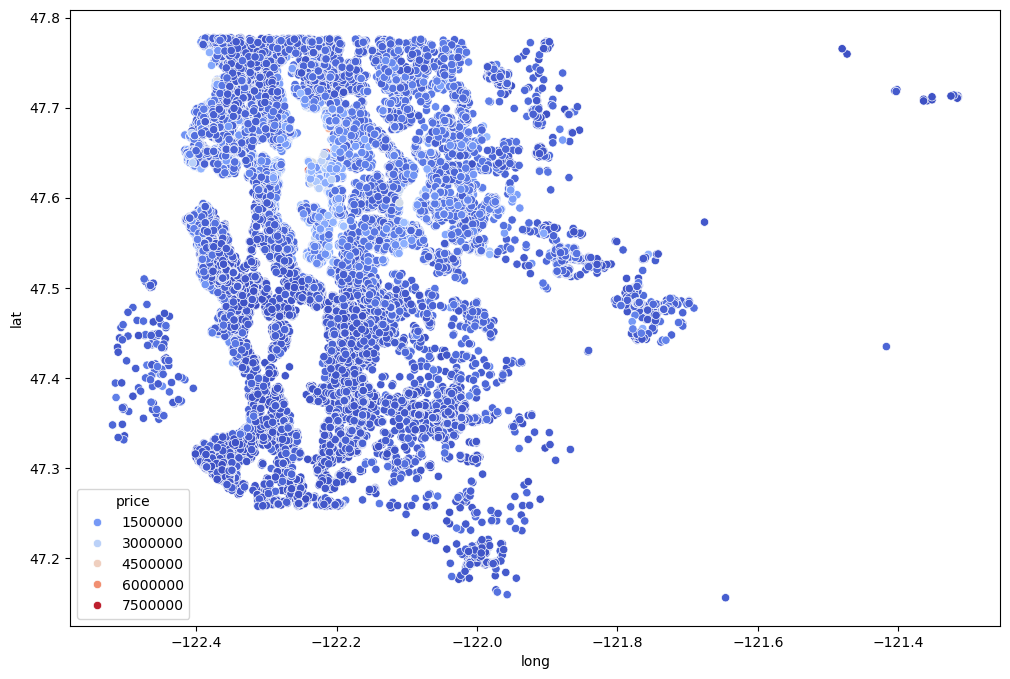

In [18]:
# visualizing the price of the houses on the map
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=df,hue='price', palette='coolwarm')

Well this does not look appealing. Because If we look at the prices of the `houses` in the `king county` as a `sorted` list, we can see that the `prices` drop significantly very fast.

In [19]:
df['price'].sort_values(ascending=False)[:20]

7245     7700000.0
3910     7060000.0
9245     6890000.0
4407     5570000.0
1446     5350000.0
1313     5300000.0
1162     5110000.0
8085     4670000.0
2624     4500000.0
8629     4490000.0
12358    4210000.0
4145     4000000.0
2083     3850000.0
7028     3800000.0
19002    3800000.0
16288    3710000.0
18467    3650000.0
6502     3650000.0
15241    3640000.0
19133    3640000.0
Name: price, dtype: float64

We started with 7 million and by the 20th price it dropped to 3 million. So, we can say that the `houses` in the `king county` are very expensive.

SO, FOr more better visualization, I'll plot the `houses` in the `king county` on the `map` with the `price` of Top 1 percent `houses` removed.

In [20]:
top_1_percent = len(df['price'])*0.01
print(f"Top 1% of the houses are {top_1_percent} houses")

Top 1% of the houses are 215.97 houses


In [21]:
top_1_percent = df.sort_values('price',ascending=False).iloc[int(top_1_percent):]

<Axes: xlabel='long', ylabel='lat'>

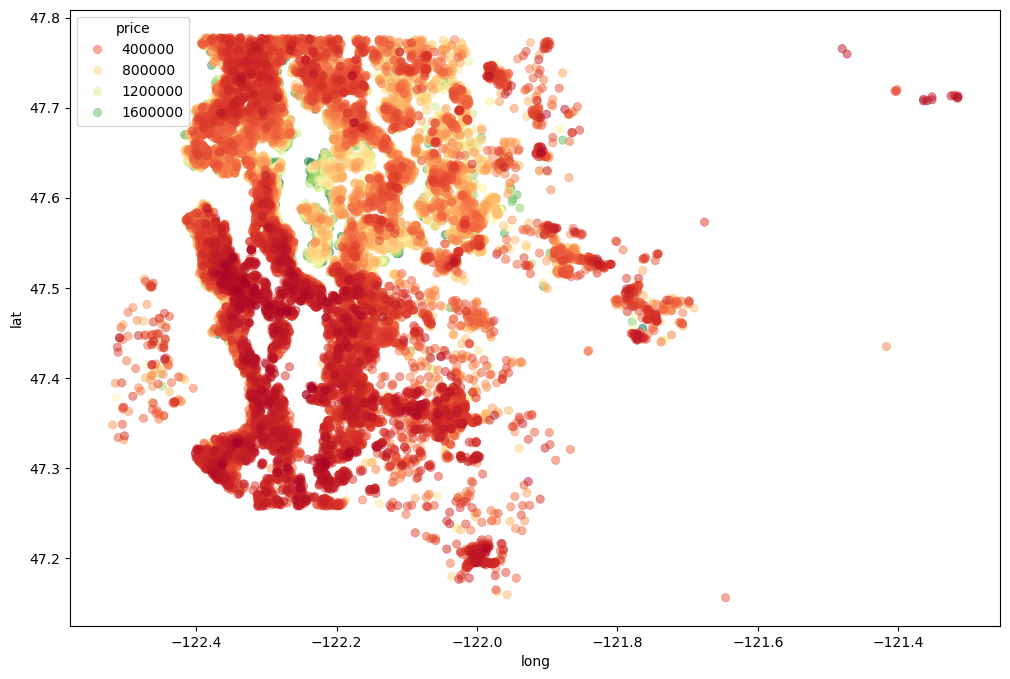

In [22]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='long',y='lat',data=top_1_percent,hue='price', palette='RdYlGn', edgecolor=None, alpha=0.5)

You can see from this `map` that the `houses` in the `king county` are very expensive but the `houses` close to the `water` are even more expensive.

Here's a box plot to show how the `price` of the `houses` are in the `waterfront` .

<Axes: xlabel='waterfront', ylabel='price'>

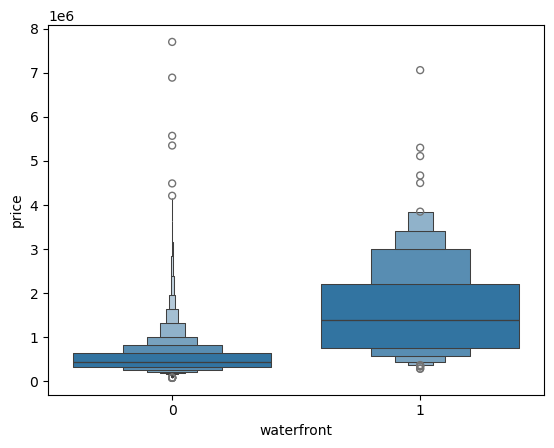

In [23]:
sns.boxenplot(x='waterfront',y='price',data=df)

Prices are very high.

### Data Cleaning

Now, I'll clean the data. I'll drop the `date` column and the `id` column because they are not necessary for the model.

But We have to keep in mind that the `year` and the `month` of the `date` column can be useful for the model. So, I'll extract the `year` and the `month` from the `date` column and then I'll drop the `date` column.

I'll leave it to you to find out the relationship between the `year` and the `month` of the `date` column and the `price` of the `house`.

In [24]:
df.drop('id',axis=1,inplace=True)
df['date'] = pd.to_datetime(df['date']) # converting the date column to datetime object
df['year'] = df['date'].apply(lambda date: date.year) # extracting the year from the date column and storing it in a new column
df['month'] = df['date'].apply(lambda date: date.month) # extracting the month from the date column and storing it in a new column
df.drop('date',axis=1,inplace=True) # dropping the date column

df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


Now we have a almost clean dataset. There is another column named `zipcode` which is a `categorical` column. I'll Again leave to you to find out the relationship between the `zipcode` column and the `price` of the `house`. But for this aritcle I'll drop the `zipcode` column. 

> ZIPCODE does have a relationship with the price of the house. Try to figure it out.

In [25]:
df.drop(columns='zipcode',inplace=True, axis=1)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  year  

There are a lot more feature engineering that can be done with this dataset. But for this article I'll stop here.

> I'll soom make a Article Solely on feature engineering.

Let's move forward to the next step which is `Making the Neural Network Model`.

## Making the Neural Network Model

First thing to do is to `split` the `dataset` into `features` and `target`.

In [27]:
X = df.drop('price',axis=1).values
y = df['price'].values

We will do the train test split of the dataset.

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101) # random_state is used to get the same split every time we run the code

Now we scale the `features` of the dataset.

> If you haven't read my article on `Neural Networks` I'll suggest you to read that first. There I talked about `scaling` the `features` of the dataset and Why it is important. (https://www.linkedin.com/feed/update/urn:li:activity:7182710281008037888/)

I'll temm you the steps:

- `Import` the `libraries`
- `Import` the `dataset`
- `EDA`
- `Data Cleaning`
- `Feature Engineering`
- `spiltting`
    - `Split` the `dataset` into `features` and `target`
    - `Train Test Split`
- `Scale` the `features` nay of the following:
    - `Standard Scaler`
    - `MinMax Scaler`
    - `Robust Scaler`
    - `Normalizer`
- `Making the Neural Network Model`
    - `Import` the `libraries`
    - `Initialize` the `model`
    - `Add` the `layers`
    - `Compile` the `model`
    - `Fit` the `model`

Thats it. So, we have done the `splitting` now we have to do the scaling of the `features`.

I'll use the `MinMax Scaler` because if you scale using the `MinMax Scaler` the `features` will be in the `range` of `0 to 1` and the `model` will be able to `learn` the `features` better.

In [29]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

Time to Scale.

In [30]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Our `features` are scaled. Now we can move forward to the next step which is `Making the Neural Network Model`.

We need two more `class` from the `keras` library which are `Sequential` and `Dense`.

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2024-04-08 13:13:07.909849: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Now we have to `initialize` the `model` and add the `layers` to the `model`. But before that I'll tell you the `architecture` of the `model` that I'll make.

Rules are:

- The `amount` of `neurons` in the `input layer` should be equal to the `number` of `features` in the `dataset`.
- The `amount` of `neurons` in the `output layer` should be equal to `1` because we are predicting the `price` of the `house`. It's a `regression` problem.
- The `amount` of `neurons` in the `hidden layers` is up to you. But I'll use `3` `hidden layers` with `32`, `32` and `32` `neurons` respectively. Keep in mind more `neurons` in the `hidden layers` means more `computational power` is needed.

Let's see how many `features` we have in the `dataset`.

In [32]:
X_train.shape

(15117, 19)

We have `19 features`, each with `15117` `samples`. So, The first layer of the `model` will have `19` `neurons` and the last layer will have `1` `neuron`.

Hidden layers will have `32`, `32` and `32` `neurons` respectively.

> We will pass `ReLU` as the `activation function` for the `hidden layers` and `linear` as the `activation function` for the `output layer`.

Let's make the `model`.

In [33]:
model = Sequential(
    [
        Dense(19,activation='relu'), # input layer
        Dense(32,activation='relu'), # hidden layer
        Dense(32,activation='relu'), # hidden layer
        Dense(32,activation='relu'), # hidden layer
        Dense(1) # output layer
    ]
)

Our `model` is ready. Now we have to `compile` the `model`.

Compiling the `model` is very important. We have to `compile` the `model` with the `loss/cost function` and the `optimizer`.

> If you don't understand the `loss/cost function` and the `optimizer` I'll suggest you to read my article on `Neural Networks & Deep Learning` in linkedin. Link is provided above.

Simple explanation:

- `Loss/Cost function` is the function that the `model` will try to `minimize` to get the `best` `weights` for the `model`. In one word, `loss/cost function` is the `error` of the `model`.
- `Optimizer` is the function that the `model` will use to `minimize` the `loss/cost function`. In one word, `optimizer` is the `function` that the `model` will use to `learn` the `features`.

Most common `loss/cost function` for `regression` problem is `mean squared error` and the most common `optimizer` is `adam`.

So, I'll `compile` the `model` with the `loss` as `mean squared error` and the `optimizer` as `adam`.

In [34]:
model.compile(optimizer='adam',loss='mse')

Now we can train the `model`.

To train the data we have to pass the `features` and the `target` to the `model` And that's it.

But to make our `AI` more `intelligent`  and to visualize the progress of the `model` we can pass some more `parameters` to the `fit` function.

- x: `features`
- y: `target`
- epochs: `number of times` the `model` will `learn` the `features`, more `epochs` means more `learning` but more `epochs` also means more `computational power` is needed.
- batch_size: `number of samples` the `model` will `learn` at a time. If you have a `big dataset` you can pass a `big number` to the `batch_size` parameter. If you have a `small dataset` you can pass a `small number` to the `batch_size` parameter.
- validation_data: `validation features` and `validation target`. By passing this parameter we can see the `loss` of the `model` on the `validation data` as well and the `model` will not `overfit` the `training data`.

After passing the learning startes.

In [35]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=128,epochs=400) # We pass the validation data to see how well the model is performing on the test data, batch_size is the number of samples that will be passed through the model at once, epochs is the number of times the model will see the data

Epoch 1/400
119/119 [==============================] - 2s 6ms/step - loss: 430186397696.0000 - val_loss: 418530721792.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 421032230912.0000 - val_loss: 385029931008.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 300898058240.0000 - val_loss: 164391223296.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 113577525248.0000 - val_loss: 95028346880.0000
Epoch 5/400
119/119 [==============================] - 0s 3ms/step - loss: 96932495360.0000 - val_loss: 92445548544.0000
Epoch 6/400
119/119 [==============================] - 0s 3ms/step - loss: 94170021888.0000 - val_loss: 89896468480.0000
Epoch 7/400
119/119 [==============================] - 0s 3ms/step - loss: 91352072192.0000 - val_loss: 87083114496.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 88515584000.0000 - val_loss: 84225343488.0000
Epoch 9/400
119/119 [====

Now we can Plot out the `loss` of the `model` on the `training data` and the `validation data`.

In [36]:
losses = pd.DataFrame(model.history.history)

<Axes: >

<Figure size 1200x800 with 0 Axes>

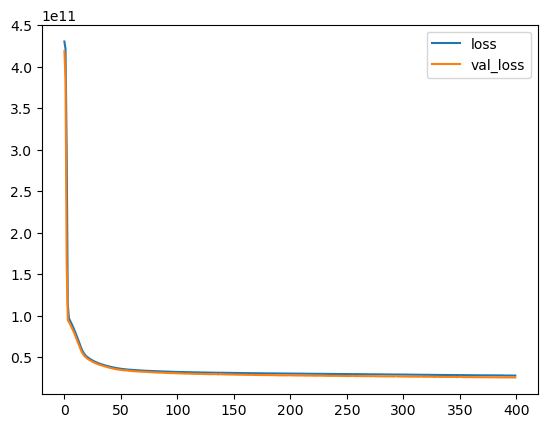

In [37]:
plt.figure(figsize=(12,8))
losses.plot()

You can see the `loss` of the `model` on the `training data` and the `validation data` and they are almost `same`. This is a good sign that the `model` is not `overfitting` the `training data` and the `model` is `learning` the `features` well and the `model` is still able to `learn` more and get `better`.

SO, time to validate.

I wrote a simple script to know how much the `model` is off from the `actual price` of the `house`.

In [38]:
from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)
mean_absolute_error(y_test,predictions)

mean_actual_price = df['price'].mean()

print(f"Mean Actual Price: {mean_actual_price}")

print(f"Mean Absolute Error: {mean_absolute_error(y_test,predictions)}")

print(f"The mean predictions is off by {mean_absolute_error(y_test,predictions)/mean_actual_price*100}%")

203/203 [==============================] - 0s 2ms/step
Mean Actual Price: 540296.5735055795
Mean Absolute Error: 99520.6119695216
The mean predictions is off by 18.419626710531762%


THIS IS NOT GOOD.

18% `error` is not good. But we can make the `model` better by `tuning` the `hyperparameters` of the `model`.

There are much more thing that can be done to make the `model` better. But for this article I'll stop here.

# Conclusion

This project was supposed to be a part of my `Neural Networks & Deep learning` article but that article was getting too long so I made this article. I hope you liked the article and learned something new from it.

I'll suggest you to go through the whole article with me to understand the whole process of the project.

I'll soon make a article on `Feature Engineering` and `Hyperparameter Tuning` to make the `model` better.

##### HAPPY MEAN_SQUARED_ERROR REDUCTION